In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import LabelEncoder,OneHotEncoder,OrdinalEncoder,StandardScaler,MinMaxScaler
import matplotlib.pyplot as plt

In [4]:
data=pd.read_csv("/content/House_Pricing.csv")

In [5]:
data.head(10)

,ID,Date House was Sold,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Waterfront View,No of Times Visited,...,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Renovated Year,Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft)
0,7129300520,14 October 2017,221900.0,3,1.00,1180.0,5650.0,1.0,No,NaN,...,7,1180.0,0,63,0,98178.0,47.5112,-122.257,1340.0,5650
1,6414100192,14 December 2017,538000.0,3,2.25,2570.0,7242.0,2.0,No,NaN,...,7,2170.0,400,67,1991,98125.0,47.7210,-122.319,1690.0,7639
2,5631500400,15 February 2016,180000.0,2,1.00,770.0,10000.0,1.0,No,NaN,...,6,770.0,0,85,0,98028.0,47.7379,-122.233,2720.0,8062
3,2487200875,14 December 2017,604000.0,4,3.00,1960.0,5000.0,1.0,No,NaN,...,7,1050.0,910,53,0,98136.0,47.5208,-122.393,1360.0,5000
4,1954400510,15 February 2016,510000.0,3,2.00,1680.0,8080.0,1.0,No,NaN,...,8,1680.0,0,31,0,98074.0,47.6168,-122.045,1800.0,7503
5,7237550310,14 May 2017,1230000.0,4,4.50,5420.0,101930.0,1.0,No,NaN,...,10,3890.0,1530,17,0,98053.0,47.6561,-122.005,4760.0,101930
6,1321400060,14 June 2017,257500.0,3,2.25,1715.0,6819.0,2.0,No,NaN,...,7,1715.0,0,23,0,98003.0,47.3097,-122.327,2238.0,6819
7,2008000270,15 January 2016,291850.0,3,1.50,1060.0,9711.0,1.0,No,NaN,...,7,1060.0,0,55,0,98198.0,47.4095,-122.315,1650.0,9711
8,2414600126,15 April 2016,229500.0,3,1.00,1780.0,7470.0,1.0,No,NaN,...,7,1050.0,730,58,0,98146.0,47.5123,-122.337,1780.0,8113
9,3793500160,15 March 2016,323000.0,3,2.50,1890.0,6560.0,2.0,No,NaN,...,7,1890.0,0,15,0,98038.0,47.3684,-122.031,2390.0,7570


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   ID                                         21613 non-null  int64  
 1   Date House was Sold                        21613 non-null  object 
 2   Sale Price                                 21609 non-null  float64
 3   No of Bedrooms                             21613 non-null  int64  
 4   No of Bathrooms                            21609 non-null  float64
 5   Flat Area (in Sqft)                        21604 non-null  float64
 6   Lot Area (in Sqft)                         21604 non-null  float64
 7   No of Floors                               21613 non-null  float64
 8   Waterfront View                            21613 non-null  object 
 9   No of Times Visited                        2124 non-null   object 
 10  Condition of the House

In [7]:
data.describe()

,ID,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Renovated Year,Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft)
count,2.161300e+04,2.160900e+04,21613.000000,21609.000000,21604.000000,2.160400e+04,21613.000000,21613.000000,21610.000000,21613.000000,21613.000000,21613.000000,21612.000000,21612.000000,21612.000000,21612.000000,21613.000000
mean,4.580302e+09,5.401984e+05,3.370842,2.114732,2079.931772,1.510776e+04,1.494309,7.623467,1788.344193,291.509045,46.994864,84.402258,98077.937766,47.560048,-122.213892,1986.538914,12768.455652
std,2.876566e+09,3.673890e+05,0.930062,0.770138,918.487597,4.142827e+04,0.539989,1.105439,827.982604,442.575043,29.373411,401.679240,53.505425,0.138565,0.140830,685.404255,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,1.000000,290.000000,0.000000,3.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1429.250000,5.040000e+03,1.000000,7.000000,1190.000000,0.000000,21.000000,0.000000,98033.000000,47.470975,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.617500e+03,1.500000,7.000000,1560.000000,0.000000,43.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068825e+04,2.000000,8.000000,2210.000000,560.000000,67.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,10.000000,9410.000000,4820.000000,118.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [8]:
data.drop(columns=['No of Times Visited'],inplace=True)

# **data cleaning**

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 20 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   ID                                         21613 non-null  int64  
 1   Date House was Sold                        21613 non-null  object 
 2   Sale Price                                 21609 non-null  float64
 3   No of Bedrooms                             21613 non-null  int64  
 4   No of Bathrooms                            21609 non-null  float64
 5   Flat Area (in Sqft)                        21604 non-null  float64
 6   Lot Area (in Sqft)                         21604 non-null  float64
 7   No of Floors                               21613 non-null  float64
 8   Waterfront View                            21613 non-null  object 
 9   Condition of the House                     21613 non-null  object 
 10  Overall Grade         

In [10]:
data.isnull().sum()

ID                                           0
Date House was Sold                          0
Sale Price                                   4
No of Bedrooms                               0
No of Bathrooms                              4
Flat Area (in Sqft)                          9
Lot Area (in Sqft)                           9
No of Floors                                 0
Waterfront View                              0
Condition of the House                       0
Overall Grade                                0
Area of the House from Basement (in Sqft)    3
Basement Area (in Sqft)                      0
Age of House (in Years)                      0
Renovated Year                               0
Zipcode                                      1
Latitude                                     1
Longitude                                    1
Living Area after Renovation (in Sqft)       1
Lot Area after Renovation (in Sqft)          0
dtype: int64

In [11]:
data.nunique()

ID                                           21436
Date House was Sold                             13
Sale Price                                    3625
No of Bedrooms                                  13
No of Bathrooms                                 30
Flat Area (in Sqft)                           1036
Lot Area (in Sqft)                            9778
No of Floors                                     6
Waterfront View                                  2
Condition of the House                           5
Overall Grade                                   10
Area of the House from Basement (in Sqft)      946
Basement Area (in Sqft)                        306
Age of House (in Years)                        116
Renovated Year                                  70
Zipcode                                         70
Latitude                                      5034
Longitude                                      752
Living Area after Renovation (in Sqft)         777
Lot Area after Renovation (in S

In [12]:
data['Condition of the House'].unique()

array(['Fair', 'Excellent', 'Good', 'Bad', 'Okay'], dtype=object)

In [13]:
data['Renovated Year'].unique()

array([   0, 1991, 2002, 2010, 1999, 1992, 2013, 1994, 1978, 2005, 2008,
       2003, 1984, 1954, 2014, 2011, 1974, 1983, 1945, 1990, 1988, 1957,
       1977, 1981, 1995, 2000, 1998, 1970, 1989, 2004, 1986, 2009, 2007,
       1987, 1973, 2006, 1985, 2001, 1980, 1971, 1979, 1997, 1950, 1969,
       1948, 2015, 1968, 2012, 1963, 1951, 1993, 1962, 1996, 1972, 1953,
       1955, 1982, 1956, 1940, 1976, 1946, 1975, 1958, 1964, 1959, 1960,
       1967, 1965, 1934, 1944])

In [14]:
data['Date House was Sold'].unique()

array(['14 October 2017', '14 December 2017', '15 February 2016',
       '14 May 2017', '14 June 2017', '15 January 2016', '15 April 2016',
       '15 March 2016', '14 July 2017', '14 August 2017',
       '14 November 2017', '14 September 2017', '15 May 2016'],
      dtype=object)

<Axes: xlabel='Flat Area (in Sqft)', ylabel='Count'>

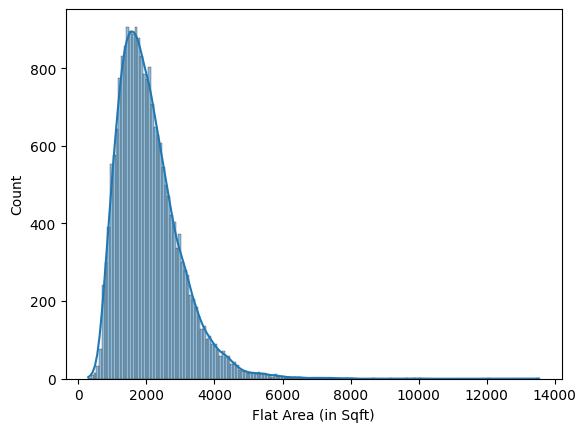

In [ ]:
sns.histplot(data['Flat Area (in Sqft)'],kde=True)

In [15]:
data['Flat Area (in Sqft)'].fillna(data['Flat Area (in Sqft)'].mode()[0],inplace=True)

In [16]:
data.isna().sum()

ID                                           0
Date House was Sold                          0
Sale Price                                   4
No of Bedrooms                               0
No of Bathrooms                              4
Flat Area (in Sqft)                          0
Lot Area (in Sqft)                           9
No of Floors                                 0
Waterfront View                              0
Condition of the House                       0
Overall Grade                                0
Area of the House from Basement (in Sqft)    3
Basement Area (in Sqft)                      0
Age of House (in Years)                      0
Renovated Year                               0
Zipcode                                      1
Latitude                                     1
Longitude                                    1
Living Area after Renovation (in Sqft)       1
Lot Area after Renovation (in Sqft)          0
dtype: int64

<Axes: xlabel='Lot Area (in Sqft)', ylabel='Count'>

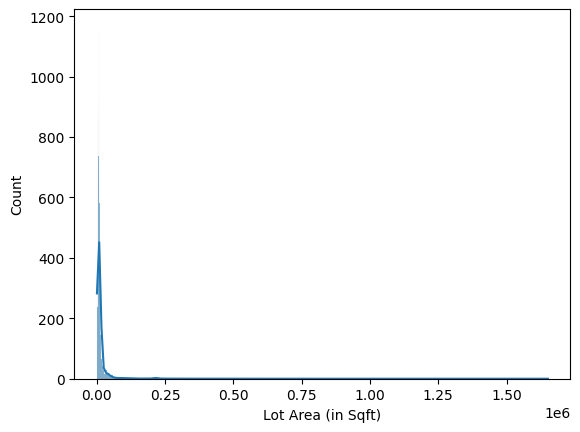

In [17]:
sns.histplot(data['Lot Area (in Sqft)'],kde=True)

In [18]:
data['Lot Area (in Sqft)'].fillna(data['Lot Area (in Sqft)'].mode()[0],inplace=True)

In [19]:
data.isna().sum()

ID                                           0
Date House was Sold                          0
Sale Price                                   4
No of Bedrooms                               0
No of Bathrooms                              4
Flat Area (in Sqft)                          0
Lot Area (in Sqft)                           0
No of Floors                                 0
Waterfront View                              0
Condition of the House                       0
Overall Grade                                0
Area of the House from Basement (in Sqft)    3
Basement Area (in Sqft)                      0
Age of House (in Years)                      0
Renovated Year                               0
Zipcode                                      1
Latitude                                     1
Longitude                                    1
Living Area after Renovation (in Sqft)       1
Lot Area after Renovation (in Sqft)          0
dtype: int64

<Axes: xlabel='Lot Area (in Sqft)', ylabel='Count'>

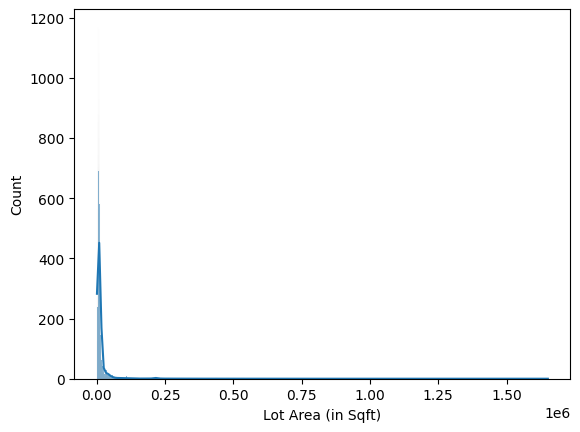

In [20]:
sns.histplot(data['Lot Area (in Sqft)'],kde=True)

In [21]:
data['No of Bathrooms'].fillna(data['No of Bathrooms'].mean(),inplace=True)
data.isna().sum()

ID                                           0
Date House was Sold                          0
Sale Price                                   4
No of Bedrooms                               0
No of Bathrooms                              0
Flat Area (in Sqft)                          0
Lot Area (in Sqft)                           0
No of Floors                                 0
Waterfront View                              0
Condition of the House                       0
Overall Grade                                0
Area of the House from Basement (in Sqft)    3
Basement Area (in Sqft)                      0
Age of House (in Years)                      0
Renovated Year                               0
Zipcode                                      1
Latitude                                     1
Longitude                                    1
Living Area after Renovation (in Sqft)       1
Lot Area after Renovation (in Sqft)          0
dtype: int64

<Axes: xlabel='Sale Price', ylabel='Count'>

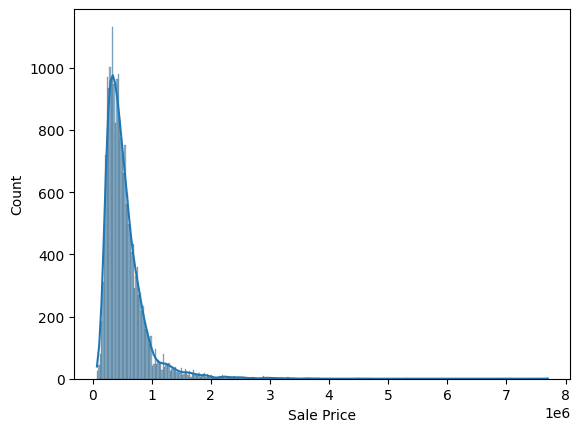

In [22]:
sns.histplot(data['Sale Price'],kde=True)

In [23]:
data['Sale Price'].mode()[0]

350000.0

In [24]:
data['Sale Price'].fillna(data['Sale Price'].mode()[0],inplace=True)

In [25]:
data.isna().sum()

ID                                           0
Date House was Sold                          0
Sale Price                                   0
No of Bedrooms                               0
No of Bathrooms                              0
Flat Area (in Sqft)                          0
Lot Area (in Sqft)                           0
No of Floors                                 0
Waterfront View                              0
Condition of the House                       0
Overall Grade                                0
Area of the House from Basement (in Sqft)    3
Basement Area (in Sqft)                      0
Age of House (in Years)                      0
Renovated Year                               0
Zipcode                                      1
Latitude                                     1
Longitude                                    1
Living Area after Renovation (in Sqft)       1
Lot Area after Renovation (in Sqft)          0
dtype: int64

<Axes: xlabel='Area of the House from Basement (in Sqft)', ylabel='Count'>

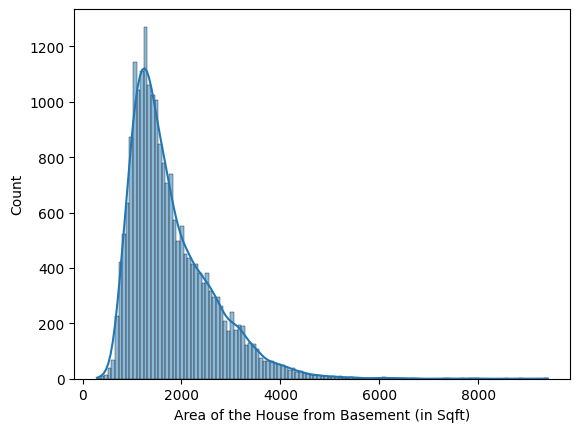

In [26]:
sns.histplot(data['Area of the House from Basement (in Sqft)'],kde=True)

In [27]:
data['Area of the House from Basement (in Sqft)'].fillna(data['Area of the House from Basement (in Sqft)'].mode()[0],inplace=True)

<Axes: xlabel='Zipcode', ylabel='Count'>

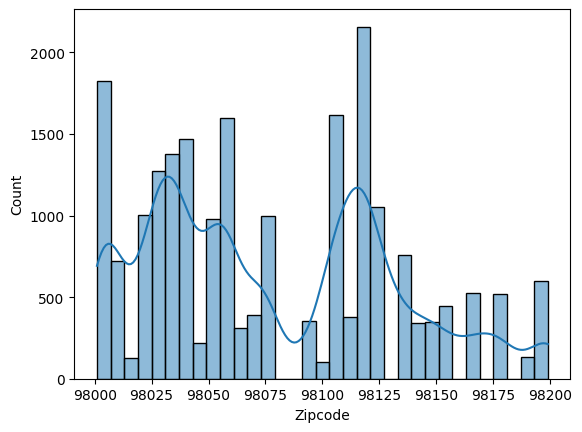

In [28]:
sns.histplot(data['Zipcode'],kde=True)

In [29]:
data['Zipcode'].fillna(data['Zipcode'].mode()[0],inplace=True)

In [30]:
data.isna().sum()

ID                                           0
Date House was Sold                          0
Sale Price                                   0
No of Bedrooms                               0
No of Bathrooms                              0
Flat Area (in Sqft)                          0
Lot Area (in Sqft)                           0
No of Floors                                 0
Waterfront View                              0
Condition of the House                       0
Overall Grade                                0
Area of the House from Basement (in Sqft)    0
Basement Area (in Sqft)                      0
Age of House (in Years)                      0
Renovated Year                               0
Zipcode                                      0
Latitude                                     1
Longitude                                    1
Living Area after Renovation (in Sqft)       1
Lot Area after Renovation (in Sqft)          0
dtype: int64

In [31]:
data['Latitude'].fillna(data['Latitude'].mode()[0],inplace=True)

In [32]:
data['Longitude'].fillna(data['Longitude'].mode()[0],inplace=True)

In [ ]:
data.isna().sum()

ID                                           0
Date House was Sold                          0
Sale Price                                   0
No of Bedrooms                               0
No of Bathrooms                              0
Flat Area (in Sqft)                          0
Lot Area (in Sqft)                           0
No of Floors                                 0
Waterfront View                              0
Condition of the House                       0
Overall Grade                                0
Area of the House from Basement (in Sqft)    0
Basement Area (in Sqft)                      0
Age of House (in Years)                      0
Renovated Year                               0
Zipcode                                      0
Latitude                                     0
Longitude                                    0
Living Area after Renovation (in Sqft)       1
Lot Area after Renovation (in Sqft)          0
dtype: int64

<Axes: xlabel='Longitude', ylabel='Count'>

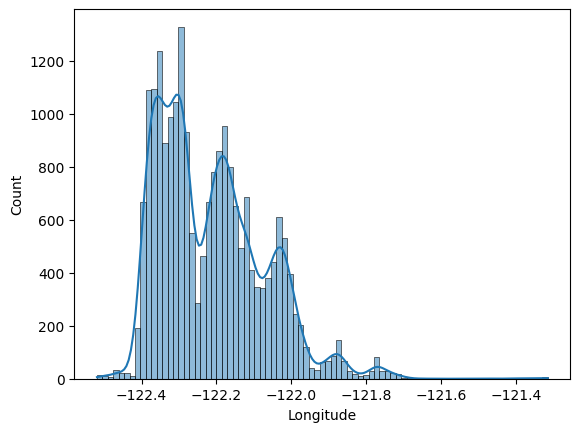

In [ ]:
sns.histplot(data['Longitude'],kde=True)

In [33]:
data['Longitude'].fillna(data['Longitude'].mode()[0],inplace=True)

In [34]:
data.isna().sum()

ID                                           0
Date House was Sold                          0
Sale Price                                   0
No of Bedrooms                               0
No of Bathrooms                              0
Flat Area (in Sqft)                          0
Lot Area (in Sqft)                           0
No of Floors                                 0
Waterfront View                              0
Condition of the House                       0
Overall Grade                                0
Area of the House from Basement (in Sqft)    0
Basement Area (in Sqft)                      0
Age of House (in Years)                      0
Renovated Year                               0
Zipcode                                      0
Latitude                                     0
Longitude                                    0
Living Area after Renovation (in Sqft)       1
Lot Area after Renovation (in Sqft)          0
dtype: int64

<Axes: xlabel='Living Area after Renovation (in Sqft)', ylabel='Count'>

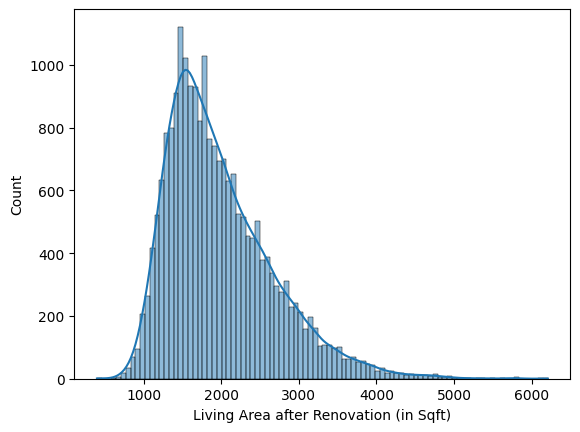

In [ ]:
sns.histplot(data['Living Area after Renovation (in Sqft)'],kde=True)

In [35]:
data['Living Area after Renovation (in Sqft)'].fillna(data['Living Area after Renovation (in Sqft)'].mode()[0],inplace=True)

In [ ]:
data.isna().sum()

ID                                           0
Date House was Sold                          0
Sale Price                                   0
No of Bedrooms                               0
No of Bathrooms                              0
Flat Area (in Sqft)                          0
Lot Area (in Sqft)                           0
No of Floors                                 0
Waterfront View                              0
Condition of the House                       0
Overall Grade                                0
Area of the House from Basement (in Sqft)    0
Basement Area (in Sqft)                      0
Age of House (in Years)                      0
Renovated Year                               0
Zipcode                                      0
Latitude                                     0
Longitude                                    0
Living Area after Renovation (in Sqft)       0
Lot Area after Renovation (in Sqft)          0
dtype: int64

# **outliers detection**

In [ ]:
data.nunique()

ID                                           21436
Date House was Sold                             13
Sale Price                                    3625
No of Bedrooms                                  13
No of Bathrooms                                 31
Flat Area (in Sqft)                           1036
Lot Area (in Sqft)                            9778
No of Floors                                     6
Waterfront View                                  2
Condition of the House                           5
Overall Grade                                   10
Area of the House from Basement (in Sqft)      946
Basement Area (in Sqft)                        306
Age of House (in Years)                        116
Renovated Year                                  70
Zipcode                                         70
Latitude                                      5034
Longitude                                      752
Living Area after Renovation (in Sqft)         777
Lot Area after Renovation (in S

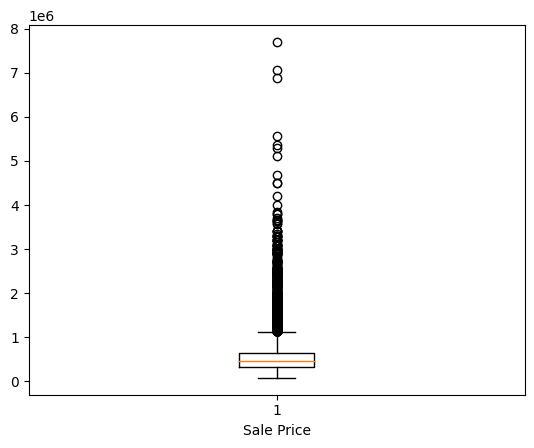

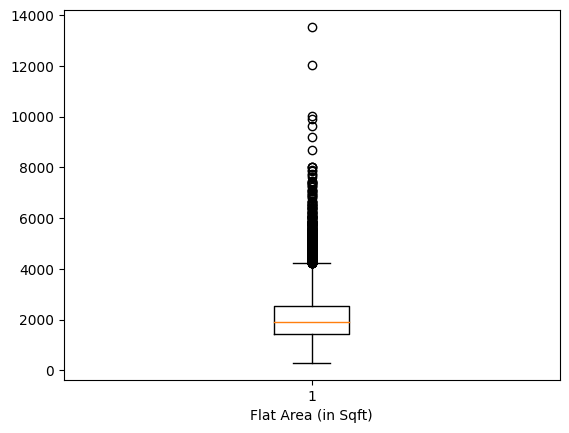

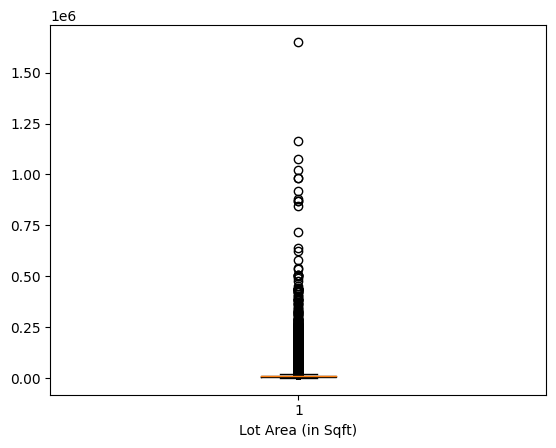

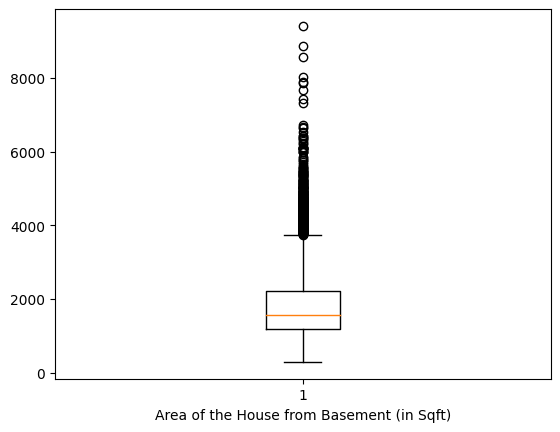

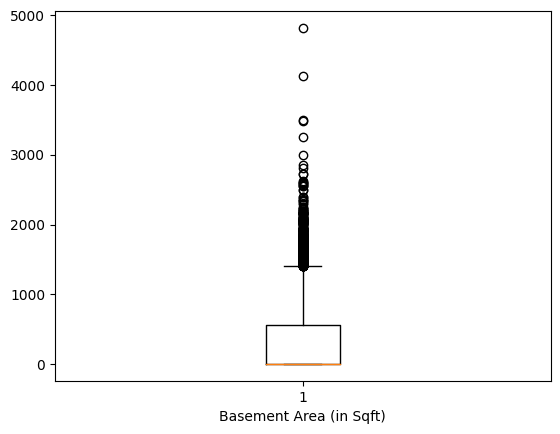

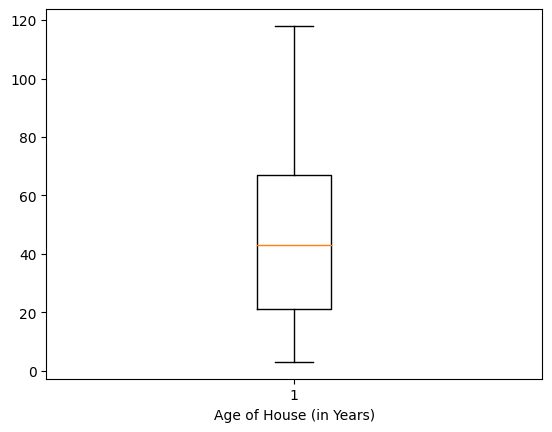

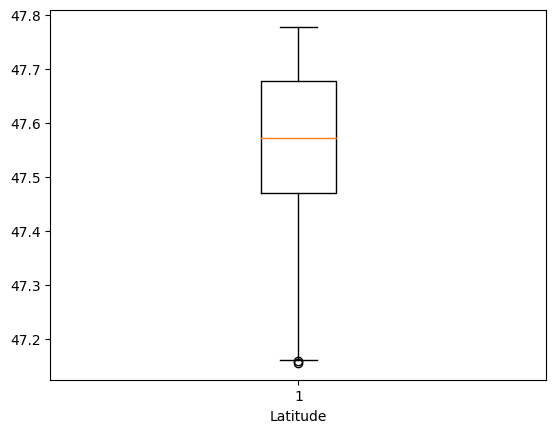

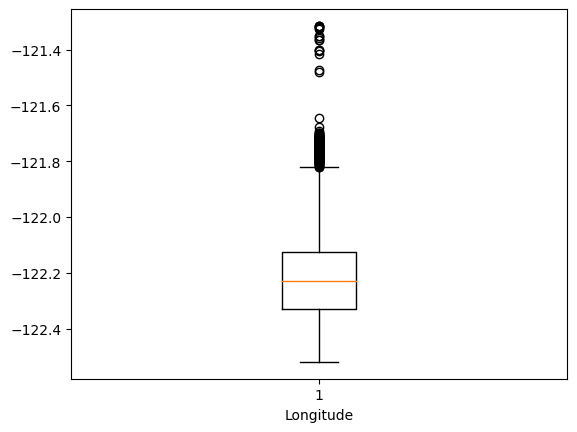

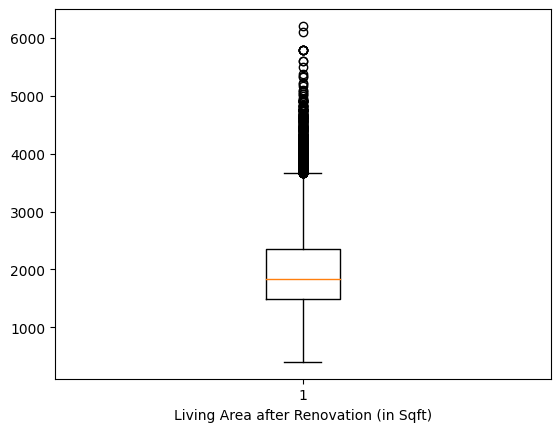

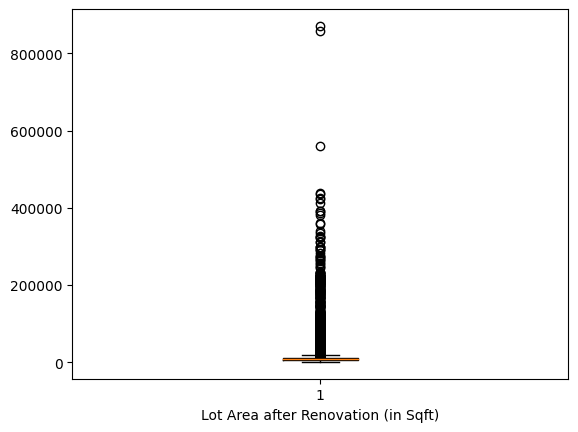

In [36]:
columny=['Sale Price','Flat Area (in Sqft)','Lot Area (in Sqft)','Area of the House from Basement (in Sqft)','Basement Area (in Sqft)','Age of House (in Years)','Latitude','Longitude','Living Area after Renovation (in Sqft)','Lot Area after Renovation (in Sqft)']
for col in columny:
  plt.boxplot(data[col])
  plt.xlabel(col)
  plt.show()

In [37]:
q1=np.percentile(data['Sale Price'],25,interpolation='midpoint')
q2=np.percentile(data['Sale Price'],50,interpolation='midpoint')
q3=np.percentile(data['Sale Price'],75,interpolation='midpoint')

In [38]:
iqr=q3-q1


In [39]:
minval=q1-(1.5*iqr)
maxval=q3+(1.5*iqr)
print(minval)
print(maxval)

-162500.0
1129500.0


In [40]:
outliers=[]
for i in data['Sale Price']:
  if(i<minval)or(i>maxval):
    outliers.append(i)
outliers

[1230000.0,
 2000000.0,
 1350000.0,
 1330000.0,
 1450000.0,
 2250000.0,
 1510000.0,
 2400000.0,
 2900000.0,
 1370000.0,
 2050000.0,
 3080000.0,
 2380000.0,
 1380000.0,
 1400000.0,
 1350000.0,
 1550000.0,
 1300000.0,
 1450000.0,
 1200000.0,
 1150000.0,
 1390000.0,
 1280000.0,
 1200000.0,
 1490000.0,
 2250000.0,
 1600000.0,
 2130000.0,
 1450000.0,
 1950000.0,
 1220000.0,
 3070000.0,
 1250000.0,
 1150000.0,
 1480000.0,
 1580000.0,
 1300000.0,
 1310000.0,
 2250000.0,
 1360000.0,
 1220000.0,
 2400000.0,
 1270000.0,
 1200000.0,
 1320000.0,
 2450000.0,
 1240000.0,
 1570000.0,
 1130000.0,
 1200000.0,
 1280000.0,
 1960000.0,
 1750000.0,
 5110000.0,
 1150000.0,
 1880000.0,
 1230000.0,
 2300000.0,
 2260000.0,
 5300000.0,
 1200000.0,
 2200000.0,
 1130000.0,
 1180000.0,
 1700000.0,
 1400000.0,
 2540000.0,
 1360000.0,
 1230000.0,
 5350000.0,
 1330000.0,
 1220000.0,
 1250000.0,
 1300000.0,
 1180000.0,
 1380000.0,
 1150000.0,
 1200000.0,
 2250000.0,
 1230000.0,
 1270000.0,
 1680000.0,
 1930000.0,
 118

In [41]:
q1=np.percentile(data['Lot Area after Renovation (in Sqft)'],25,interpolation='midpoint')
q2=np.percentile(data['Lot Area after Renovation (in Sqft)'],50,interpolation='midpoint')
q3=np.percentile(data['Lot Area after Renovation (in Sqft)'],75,interpolation='midpoint')

In [42]:
data['Lot Area after Renovation (in Sqft)'].describe()

count     21613.000000
mean      12768.455652
std       27304.179631
min         651.000000
25%        5100.000000
50%        7620.000000
75%       10083.000000
max      871200.000000
Name: Lot Area after Renovation (in Sqft), dtype: float64

In [ ]:
minval=q1-(1.5*iqr)
maxval=q3+(1.5*iqr)
print(minval)
print(maxval)

-479400.0
494583.0


In [ ]:
outliers=[]
for i in data['Sale Price']:
  if(i<minval)or(i>maxval):
    outliers.append(i)
outliers

[538000.0,
 604000.0,
 510000.0,
 1230000.0,
 662500.0,
 530000.0,
 650000.0,
 2000000.0,
 937000.0,
 667000.0,
 719000.0,
 580500.0,
 687500.0,
 535000.0,
 696000.0,
 550000.0,
 640000.0,
 605000.0,
 625000.0,
 775000.0,
 861990.0,
 685000.0,
 785000.0,
 1350000.0,
 600000.0,
 585000.0,
 920000.0,
 885000.0,
 951000.0,
 650000.0,
 505000.0,
 549000.0,
 975000.0,
 1330000.0,
 1040000.0,
 571000.0,
 832500.0,
 720000.0,
 940000.0,
 1100000.0,
 700000.0,
 905000.0,
 850830.0,
 555000.0,
 699950.0,
 1090000.0,
 680000.0,
 597750.0,
 570000.0,
 740500.0,
 518500.0,
 535000.0,
 660000.0,
 770000.0,
 1450000.0,
 822500.0,
 660500.0,
 784000.0,
 675000.0,
 519950.0,
 665000.0,
 527700.0,
 500000.0,
 921500.0,
 890000.0,
 511000.0,
 532170.0,
 560000.0,
 2250000.0,
 650000.0,
 900000.0,
 807100.0,
 917500.0,
 673000.0,
 589000.0,
 835000.0,
 1100000.0,
 560000.0,
 615000.0,
 585188.0,
 799000.0,
 840000.0,
 677900.0,
 625504.0,
 592500.0,
 1510000.0,
 1070000.0,
 686000.0,
 527000.0,
 516500.0

# **data encoding**

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 20 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   ID                                         21613 non-null  int64  
 1   Date House was Sold                        21613 non-null  object 
 2   Sale Price                                 21613 non-null  float64
 3   No of Bedrooms                             21613 non-null  int64  
 4   No of Bathrooms                            21613 non-null  float64
 5   Flat Area (in Sqft)                        21613 non-null  float64
 6   Lot Area (in Sqft)                         21613 non-null  float64
 7   No of Floors                               21613 non-null  float64
 8   Waterfront View                            21613 non-null  object 
 9   Condition of the House                     21613 non-null  object 
 10  Overall Grade         

In [ ]:
data.head()

,ID,Date House was Sold,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Waterfront View,Condition of the House,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Renovated Year,Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft)
0,7129300520,14 October 2017,221900.0,3,1.00,1180.0,5650.0,1.0,No,Fair,7,1180.0,0,63,0,98178.0,47.5112,-122.257,1340.0,5650
1,6414100192,14 December 2017,538000.0,3,2.25,2570.0,7242.0,2.0,No,Fair,7,2170.0,400,67,1991,98125.0,47.7210,-122.319,1690.0,7639
2,5631500400,15 February 2016,180000.0,2,1.00,770.0,10000.0,1.0,No,Fair,6,770.0,0,85,0,98028.0,47.7379,-122.233,2720.0,8062
3,2487200875,14 December 2017,604000.0,4,3.00,1960.0,5000.0,1.0,No,Excellent,7,1050.0,910,53,0,98136.0,47.5208,-122.393,1360.0,5000
4,1954400510,15 February 2016,510000.0,3,2.00,1680.0,8080.0,1.0,No,Fair,8,1680.0,0,31,0,98074.0,47.6168,-122.045,1800.0,7503


In [52]:
data_enc=data.copy()

In [ ]:
data['Condition of the House'].unique()

array(['Fair', 'Excellent', 'Good', 'Bad', 'Okay'], dtype=object)

In [53]:
ordinal=OrdinalEncoder(categories=[['Fair', 'Excellent', 'Good', 'Bad', 'Okay']])
data_enc['Condition of the House']=ordinal.fit_transform(data[['Condition of the House']])

In [46]:
data_enc

,ID,Date House was Sold,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Waterfront View,Condition of the House,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Renovated Year,Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft)
0,7129300520,14 October 2017,221900.0,3,1.00,1180.0,5650.0,1.0,No,0.0,7,1180.0,0,63,0,98178.0,47.5112,-122.257,1340.0,5650
1,6414100192,14 December 2017,538000.0,3,2.25,2570.0,7242.0,2.0,No,0.0,7,2170.0,400,67,1991,98125.0,47.7210,-122.319,1690.0,7639
2,5631500400,15 February 2016,180000.0,2,1.00,770.0,10000.0,1.0,No,0.0,6,770.0,0,85,0,98028.0,47.7379,-122.233,2720.0,8062
3,2487200875,14 December 2017,604000.0,4,3.00,1960.0,5000.0,1.0,No,1.0,7,1050.0,910,53,0,98136.0,47.5208,-122.393,1360.0,5000
4,1954400510,15 February 2016,510000.0,3,2.00,1680.0,8080.0,1.0,No,0.0,8,1680.0,0,31,0,98074.0,47.6168,-122.045,1800.0,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,14 May 2017,360000.0,3,2.50,1530.0,1131.0,3.0,No,0.0,8,1530.0,0,9,0,98103.0,47.6993,-122.346,1530.0,1509
21609,6600060120,15 February 2016,400000.0,4,2.50,2310.0,5813.0,2.0,No,0.0,8,2310.0,0,4,0,98146.0,47.5107,-122.362,1830.0,7200
21610,1523300141,14 June 2017,402101.0,2,0.75,1020.0,1350.0,2.0,No,0.0,7,1020.0,0,9,0,98144.0,47.5944,-122.299,1020.0,2007
21611,291310100,15 January 2016,400000.0,3,2.50,1600.0,2388.0,2.0,No,0.0,8,1600.0,0,14,0,98027.0,47.5345,-122.069,1410.0,1287


In [50]:
data['Waterfront View'].unique()

array(['No', 'Yes'], dtype=object)

In [54]:
encoder = LabelEncoder()
data_enc['Waterfront View'] = encoder.fit_transform(data_enc['Waterfront View'])

In [55]:
data_enc

,ID,Date House was Sold,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Waterfront View,Condition of the House,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Renovated Year,Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft)
0,7129300520,14 October 2017,221900.0,3,1.00,1180.0,5650.0,1.0,0,0.0,7,1180.0,0,63,0,98178.0,47.5112,-122.257,1340.0,5650
1,6414100192,14 December 2017,538000.0,3,2.25,2570.0,7242.0,2.0,0,0.0,7,2170.0,400,67,1991,98125.0,47.7210,-122.319,1690.0,7639
2,5631500400,15 February 2016,180000.0,2,1.00,770.0,10000.0,1.0,0,0.0,6,770.0,0,85,0,98028.0,47.7379,-122.233,2720.0,8062
3,2487200875,14 December 2017,604000.0,4,3.00,1960.0,5000.0,1.0,0,1.0,7,1050.0,910,53,0,98136.0,47.5208,-122.393,1360.0,5000
4,1954400510,15 February 2016,510000.0,3,2.00,1680.0,8080.0,1.0,0,0.0,8,1680.0,0,31,0,98074.0,47.6168,-122.045,1800.0,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,14 May 2017,360000.0,3,2.50,1530.0,1131.0,3.0,0,0.0,8,1530.0,0,9,0,98103.0,47.6993,-122.346,1530.0,1509
21609,6600060120,15 February 2016,400000.0,4,2.50,2310.0,5813.0,2.0,0,0.0,8,2310.0,0,4,0,98146.0,47.5107,-122.362,1830.0,7200
21610,1523300141,14 June 2017,402101.0,2,0.75,1020.0,1350.0,2.0,0,0.0,7,1020.0,0,9,0,98144.0,47.5944,-122.299,1020.0,2007
21611,291310100,15 January 2016,400000.0,3,2.50,1600.0,2388.0,2.0,0,0.0,8,1600.0,0,14,0,98027.0,47.5345,-122.069,1410.0,1287


In [56]:
data_enc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 20 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   ID                                         21613 non-null  int64  
 1   Date House was Sold                        21613 non-null  object 
 2   Sale Price                                 21613 non-null  float64
 3   No of Bedrooms                             21613 non-null  int64  
 4   No of Bathrooms                            21613 non-null  float64
 5   Flat Area (in Sqft)                        21613 non-null  float64
 6   Lot Area (in Sqft)                         21613 non-null  float64
 7   No of Floors                               21613 non-null  float64
 8   Waterfront View                            21613 non-null  int64  
 9   Condition of the House                     21613 non-null  float64
 10  Overall Grade         

In [57]:
data['Date House was Sold'] = pd.to_datetime(data['Date House was Sold'])

In [59]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 20 columns):
 #   Column                                     Non-Null Count  Dtype         
---  ------                                     --------------  -----         
 0   ID                                         21613 non-null  int64         
 1   Date House was Sold                        21613 non-null  datetime64[ns]
 2   Sale Price                                 21613 non-null  float64       
 3   No of Bedrooms                             21613 non-null  int64         
 4   No of Bathrooms                            21613 non-null  float64       
 5   Flat Area (in Sqft)                        21613 non-null  float64       
 6   Lot Area (in Sqft)                         21613 non-null  float64       
 7   No of Floors                               21613 non-null  float64       
 8   Waterfront View                            21613 non-null  object        
 9   Condition of the 

In [60]:
data_enc['Date House was Sold']=pd.to_datetime(data_enc['Date House was Sold'])
data_enc

,ID,Date House was Sold,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Waterfront View,Condition of the House,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Renovated Year,Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft)
0,7129300520,2017-10-14,221900.0,3,1.00,1180.0,5650.0,1.0,0,0.0,7,1180.0,0,63,0,98178.0,47.5112,-122.257,1340.0,5650
1,6414100192,2017-12-14,538000.0,3,2.25,2570.0,7242.0,2.0,0,0.0,7,2170.0,400,67,1991,98125.0,47.7210,-122.319,1690.0,7639
2,5631500400,2016-02-15,180000.0,2,1.00,770.0,10000.0,1.0,0,0.0,6,770.0,0,85,0,98028.0,47.7379,-122.233,2720.0,8062
3,2487200875,2017-12-14,604000.0,4,3.00,1960.0,5000.0,1.0,0,1.0,7,1050.0,910,53,0,98136.0,47.5208,-122.393,1360.0,5000
4,1954400510,2016-02-15,510000.0,3,2.00,1680.0,8080.0,1.0,0,0.0,8,1680.0,0,31,0,98074.0,47.6168,-122.045,1800.0,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,2017-05-14,360000.0,3,2.50,1530.0,1131.0,3.0,0,0.0,8,1530.0,0,9,0,98103.0,47.6993,-122.346,1530.0,1509
21609,6600060120,2016-02-15,400000.0,4,2.50,2310.0,5813.0,2.0,0,0.0,8,2310.0,0,4,0,98146.0,47.5107,-122.362,1830.0,7200
21610,1523300141,2017-06-14,402101.0,2,0.75,1020.0,1350.0,2.0,0,0.0,7,1020.0,0,9,0,98144.0,47.5944,-122.299,1020.0,2007
21611,291310100,2016-01-15,400000.0,3,2.50,1600.0,2388.0,2.0,0,0.0,8,1600.0,0,14,0,98027.0,47.5345,-122.069,1410.0,1287


In [65]:
data_enc['month sold']=data_enc['Date House was Sold'].dt.month

In [66]:
data_enc

,ID,Date House was Sold,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Waterfront View,Condition of the House,...,Basement Area (in Sqft),Age of House (in Years),Renovated Year,Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft),date,month sold
0,7129300520,2017-10-14,221900.0,3,1.00,1180.0,5650.0,1.0,0,0.0,...,0,63,0,98178.0,47.5112,-122.257,1340.0,5650,10,10
1,6414100192,2017-12-14,538000.0,3,2.25,2570.0,7242.0,2.0,0,0.0,...,400,67,1991,98125.0,47.7210,-122.319,1690.0,7639,12,12
2,5631500400,2016-02-15,180000.0,2,1.00,770.0,10000.0,1.0,0,0.0,...,0,85,0,98028.0,47.7379,-122.233,2720.0,8062,2,2
3,2487200875,2017-12-14,604000.0,4,3.00,1960.0,5000.0,1.0,0,1.0,...,910,53,0,98136.0,47.5208,-122.393,1360.0,5000,12,12
4,1954400510,2016-02-15,510000.0,3,2.00,1680.0,8080.0,1.0,0,0.0,...,0,31,0,98074.0,47.6168,-122.045,1800.0,7503,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,2017-05-14,360000.0,3,2.50,1530.0,1131.0,3.0,0,0.0,...,0,9,0,98103.0,47.6993,-122.346,1530.0,1509,5,5
21609,6600060120,2016-02-15,400000.0,4,2.50,2310.0,5813.0,2.0,0,0.0,...,0,4,0,98146.0,47.5107,-122.362,1830.0,7200,2,2
21610,1523300141,2017-06-14,402101.0,2,0.75,1020.0,1350.0,2.0,0,0.0,...,0,9,0,98144.0,47.5944,-122.299,1020.0,2007,6,6
21611,291310100,2016-01-15,400000.0,3,2.50,1600.0,2388.0,2.0,0,0.0,...,0,14,0,98027.0,47.5345,-122.069,1410.0,1287,1,1


In [67]:
data_enc['year_sold']=data_enc['Date House was Sold'].dt.year
data_enc

,ID,Date House was Sold,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Waterfront View,Condition of the House,...,Age of House (in Years),Renovated Year,Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft),date,month sold,year_sold
0,7129300520,2017-10-14,221900.0,3,1.00,1180.0,5650.0,1.0,0,0.0,...,63,0,98178.0,47.5112,-122.257,1340.0,5650,10,10,2017
1,6414100192,2017-12-14,538000.0,3,2.25,2570.0,7242.0,2.0,0,0.0,...,67,1991,98125.0,47.7210,-122.319,1690.0,7639,12,12,2017
2,5631500400,2016-02-15,180000.0,2,1.00,770.0,10000.0,1.0,0,0.0,...,85,0,98028.0,47.7379,-122.233,2720.0,8062,2,2,2016
3,2487200875,2017-12-14,604000.0,4,3.00,1960.0,5000.0,1.0,0,1.0,...,53,0,98136.0,47.5208,-122.393,1360.0,5000,12,12,2017
4,1954400510,2016-02-15,510000.0,3,2.00,1680.0,8080.0,1.0,0,0.0,...,31,0,98074.0,47.6168,-122.045,1800.0,7503,2,2,2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,2017-05-14,360000.0,3,2.50,1530.0,1131.0,3.0,0,0.0,...,9,0,98103.0,47.6993,-122.346,1530.0,1509,5,5,2017
21609,6600060120,2016-02-15,400000.0,4,2.50,2310.0,5813.0,2.0,0,0.0,...,4,0,98146.0,47.5107,-122.362,1830.0,7200,2,2,2016
21610,1523300141,2017-06-14,402101.0,2,0.75,1020.0,1350.0,2.0,0,0.0,...,9,0,98144.0,47.5944,-122.299,1020.0,2007,6,6,2017
21611,291310100,2016-01-15,400000.0,3,2.50,1600.0,2388.0,2.0,0,0.0,...,14,0,98027.0,47.5345,-122.069,1410.0,1287,1,1,2016


In [68]:
data_enc['day_sold']=data_enc['Date House was Sold'].dt.day
data_enc

,ID,Date House was Sold,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Waterfront View,Condition of the House,...,Renovated Year,Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft),date,month sold,year_sold,day_sold
0,7129300520,2017-10-14,221900.0,3,1.00,1180.0,5650.0,1.0,0,0.0,...,0,98178.0,47.5112,-122.257,1340.0,5650,10,10,2017,14
1,6414100192,2017-12-14,538000.0,3,2.25,2570.0,7242.0,2.0,0,0.0,...,1991,98125.0,47.7210,-122.319,1690.0,7639,12,12,2017,14
2,5631500400,2016-02-15,180000.0,2,1.00,770.0,10000.0,1.0,0,0.0,...,0,98028.0,47.7379,-122.233,2720.0,8062,2,2,2016,15
3,2487200875,2017-12-14,604000.0,4,3.00,1960.0,5000.0,1.0,0,1.0,...,0,98136.0,47.5208,-122.393,1360.0,5000,12,12,2017,14
4,1954400510,2016-02-15,510000.0,3,2.00,1680.0,8080.0,1.0,0,0.0,...,0,98074.0,47.6168,-122.045,1800.0,7503,2,2,2016,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,2017-05-14,360000.0,3,2.50,1530.0,1131.0,3.0,0,0.0,...,0,98103.0,47.6993,-122.346,1530.0,1509,5,5,2017,14
21609,6600060120,2016-02-15,400000.0,4,2.50,2310.0,5813.0,2.0,0,0.0,...,0,98146.0,47.5107,-122.362,1830.0,7200,2,2,2016,15
21610,1523300141,2017-06-14,402101.0,2,0.75,1020.0,1350.0,2.0,0,0.0,...,0,98144.0,47.5944,-122.299,1020.0,2007,6,6,2017,14
21611,291310100,2016-01-15,400000.0,3,2.50,1600.0,2388.0,2.0,0,0.0,...,0,98027.0,47.5345,-122.069,1410.0,1287,1,1,2016,15


In [72]:
data_enc['No of Bedrooms'].unique()

array([ 3,  2,  4,  5,  1,  6,  7,  0,  8,  9, 11, 10, 33])

In [73]:
data_enc.drop(['Date House was Sold','date'],axis=1)

,ID,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Waterfront View,Condition of the House,Overall Grade,...,Age of House (in Years),Renovated Year,Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft),month sold,year_sold,day_sold
0,7129300520,221900.0,3,1.00,1180.0,5650.0,1.0,0,0.0,7,...,63,0,98178.0,47.5112,-122.257,1340.0,5650,10,2017,14
1,6414100192,538000.0,3,2.25,2570.0,7242.0,2.0,0,0.0,7,...,67,1991,98125.0,47.7210,-122.319,1690.0,7639,12,2017,14
2,5631500400,180000.0,2,1.00,770.0,10000.0,1.0,0,0.0,6,...,85,0,98028.0,47.7379,-122.233,2720.0,8062,2,2016,15
3,2487200875,604000.0,4,3.00,1960.0,5000.0,1.0,0,1.0,7,...,53,0,98136.0,47.5208,-122.393,1360.0,5000,12,2017,14
4,1954400510,510000.0,3,2.00,1680.0,8080.0,1.0,0,0.0,8,...,31,0,98074.0,47.6168,-122.045,1800.0,7503,2,2016,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,360000.0,3,2.50,1530.0,1131.0,3.0,0,0.0,8,...,9,0,98103.0,47.6993,-122.346,1530.0,1509,5,2017,14
21609,6600060120,400000.0,4,2.50,2310.0,5813.0,2.0,0,0.0,8,...,4,0,98146.0,47.5107,-122.362,1830.0,7200,2,2016,15
21610,1523300141,402101.0,2,0.75,1020.0,1350.0,2.0,0,0.0,7,...,9,0,98144.0,47.5944,-122.299,1020.0,2007,6,2017,14
21611,291310100,400000.0,3,2.50,1600.0,2388.0,2.0,0,0.0,8,...,14,0,98027.0,47.5345,-122.069,1410.0,1287,1,2016,15


In [78]:
numcols=['No of Bedrooms','No of Bathrooms','Flat Area (in Sqft)','Lot Area (in Sqft)','No of Floors','Condition of the House','Overall Grade','Renovated Year','Renovated Year','Latitude','Longitude','Living Area after Renovation (in Sqft)','Lot Area after Renovation (in Sqft)','month sold','year_sold','day_sold']

In [79]:
data_min=data_enc.copy()
min_scalar=MinMaxScaler()
data_min[numcols]=min_scalar.fit_transform(data_enc[numcols])
data_min

,ID,Date House was Sold,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Waterfront View,Condition of the House,...,Renovated Year,Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft),date,month sold,year_sold,day_sold
0,7129300520,2017-10-14,221900.0,0.090909,0.12500,0.067170,0.003108,0.0,0,0.00,...,0.000000,98178.0,0.571498,0.217608,0.161934,0.005742,10,0.818182,1.0,0.0
1,6414100192,2017-12-14,538000.0,0.090909,0.28125,0.172075,0.004072,0.4,0,0.00,...,0.988089,98125.0,0.908959,0.166113,0.222165,0.008027,12,1.000000,1.0,0.0
2,5631500400,2016-02-15,180000.0,0.060606,0.12500,0.036226,0.005743,0.0,0,0.00,...,0.000000,98028.0,0.936143,0.237542,0.399415,0.008513,2,0.090909,0.0,1.0
3,2487200875,2017-12-14,604000.0,0.121212,0.37500,0.126038,0.002714,0.0,0,0.25,...,0.000000,98136.0,0.586939,0.104651,0.165376,0.004996,12,1.000000,1.0,0.0
4,1954400510,2016-02-15,510000.0,0.090909,0.25000,0.104906,0.004579,0.0,0,0.00,...,0.000000,98074.0,0.741354,0.393688,0.241094,0.007871,2,0.090909,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,2017-05-14,360000.0,0.090909,0.31250,0.093585,0.000370,0.8,0,0.00,...,0.000000,98103.0,0.874055,0.143688,0.194631,0.000986,5,0.363636,1.0,0.0
21609,6600060120,2016-02-15,400000.0,0.121212,0.31250,0.152453,0.003206,0.4,0,0.00,...,0.000000,98146.0,0.570693,0.130399,0.246257,0.007523,2,0.090909,0.0,1.0
21610,1523300141,2017-06-14,402101.0,0.060606,0.09375,0.055094,0.000503,0.4,0,0.00,...,0.000000,98144.0,0.705324,0.182724,0.106866,0.001558,6,0.454545,1.0,0.0
21611,291310100,2016-01-15,400000.0,0.090909,0.31250,0.098868,0.001132,0.4,0,0.00,...,0.000000,98027.0,0.608975,0.373754,0.173980,0.000731,1,0.000000,0.0,1.0


Error: Runtime no longer has a reference to this dataframe, please re-run this cell and try again.


from matplotlib import pyplot as plt
data_min['ID'].plot(kind='hist', bins=20, title='ID')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
data_min['Sale Price'].plot(kind='hist', bins=20, title='Sale Price')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
data_min['No of Bedrooms'].plot(kind='hist', bins=20, title='No of Bedrooms')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
data_min['No of Bathrooms'].plot(kind='hist', bins=20, title='No of Bathrooms')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
data_min.plot(kind='scatter', x='ID', y='Sale Price', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
data_min.plot(kind='scatter', x='Sale Price', y='No of Bedrooms', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
data_min.plot(kind='scatter', x='No of Bedrooms', y='No of Bathrooms', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
data_min.plot(kind='scatter', x='No of Bathrooms', y='Flat Area (in Sqft)', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Date House was Sold']
  ys = series['ID']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = data_min.sort_values('Date House was Sold', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Date House was Sold')
_ = plt.ylabel('ID')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Date House was Sold']
  ys = series['Sale Price']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = data_min.sort_values('Date House was Sold', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Date House was Sold')
_ = plt.ylabel('Sale Price')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Date House was Sold']
  ys = series['No of Bedrooms']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = data_min.sort_values('Date House was Sold', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Date House was Sold')
_ = plt.ylabel('No of Bedrooms')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Date House was Sold']
  ys = series['No of Bathrooms']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = data_min.sort_values('Date House was Sold', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Date House was Sold')
_ = plt.ylabel('No of Bathrooms')

from matplotlib import pyplot as plt
data_min['ID'].plot(kind='line', figsize=(8, 4), title='ID')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
data_min['Sale Price'].plot(kind='line', figsize=(8, 4), title='Sale Price')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
data_min['No of Bedrooms'].plot(kind='line', figsize=(8, 4), title='No of Bedrooms')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
data_min['No of Bathrooms'].plot(kind='line', figsize=(8, 4), title='No of Bathrooms')
plt.gca().spines[['top', 'right']].set_visible(False)

In [88]:
data_min.drop(['Date House was Sold','date'],axis=1,inplace=True)

In [90]:
data_corr=data_min.corr()

In [91]:
data_corr

,ID,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Waterfront View,Condition of the House,Overall Grade,...,Age of House (in Years),Renovated Year,Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft),month sold,year_sold,day_sold
ID,1.000000,-0.016763,0.001286,0.005185,-0.012403,-0.132125,0.018525,-0.002721,-0.031150,0.013799,...,-0.021380,-0.016907,-0.008244,-0.001968,0.020800,-0.002867,-0.138798,-0.011708,-0.010128,0.010128
Sale Price,-0.016763,1.000000,0.308340,0.525012,0.701978,0.089566,0.256784,0.266334,-0.034860,0.580638,...,-0.053942,0.126452,-0.053172,0.306849,0.021577,0.585377,0.082467,-0.010018,-0.003532,0.003532
No of Bedrooms,0.001286,0.308340,1.000000,0.515871,0.576528,0.031688,0.175429,-0.006582,-0.024592,0.349008,...,-0.154178,0.018841,-0.152664,-0.008865,0.129480,0.391655,0.029244,-0.001533,0.009838,-0.009838
No of Bathrooms,0.005185,0.525012,0.515871,1.000000,0.754455,0.087720,0.500561,0.063754,-0.202709,0.635539,...,-0.505908,0.050752,-0.203982,0.024520,0.223128,0.568506,0.087217,0.007184,0.026451,-0.026451
Flat Area (in Sqft),-0.012403,0.701978,0.576528,0.754455,1.000000,0.172737,0.353793,0.103846,-0.114165,0.705554,...,-0.317849,0.055430,-0.199365,0.052515,0.240072,0.756060,0.183248,0.012005,0.029265,-0.029265
Lot Area (in Sqft),-0.132125,0.089566,0.031688,0.087720,0.172737,1.000000,-0.005213,0.021611,0.023348,0.102309,...,-0.053075,0.007619,-0.129550,-0.085718,0.229471,0.144517,0.718529,-0.002373,-0.005522,0.005522
No of Floors,0.018525,0.256784,0.175429,0.500561,0.353793,-0.005213,1.000000,0.023698,-0.304068,0.461228,...,-0.489319,0.006338,-0.059121,0.049656,0.125411,0.279837,-0.011269,0.014005,0.022315,-0.022315
Waterfront View,-0.002721,0.266334,-0.006582,0.063754,0.103846,0.021611,0.023698,1.000000,0.013061,0.070333,...,0.026161,0.092885,0.030286,-0.014270,-0.041911,0.086467,0.030703,0.008132,0.004165,-0.004165
Condition of the House,-0.031150,-0.034860,-0.024592,-0.202709,-0.114165,0.023348,-0.304068,0.013061,1.000000,-0.199077,...,0.347175,-0.064279,-0.030408,-0.055166,-0.086972,-0.109709,0.022301,0.002094,0.013309,-0.013309
Overall Grade,0.013799,0.580638,0.349008,0.635539,0.705554,0.102309,0.461228,0.070333,-0.199077,1.000000,...,-0.456629,0.010440,-0.185827,0.111305,0.201756,0.681320,0.107581,0.007640,0.030953,-0.030953


In [89]:
data_min.head(20)

,ID,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Waterfront View,Condition of the House,Overall Grade,...,Age of House (in Years),Renovated Year,Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft),month sold,year_sold,day_sold
0,7129300520,221900.0,0.090909,0.12500,0.067170,0.003108,0.0,0,0.00,0.666667,...,63,0.000000,98178.0,0.571498,0.217608,0.161934,0.005742,0.818182,1.0,0.0
1,6414100192,538000.0,0.090909,0.28125,0.172075,0.004072,0.4,0,0.00,0.666667,...,67,0.988089,98125.0,0.908959,0.166113,0.222165,0.008027,1.000000,1.0,0.0
2,5631500400,180000.0,0.060606,0.12500,0.036226,0.005743,0.0,0,0.00,0.555556,...,85,0.000000,98028.0,0.936143,0.237542,0.399415,0.008513,0.090909,0.0,1.0
3,2487200875,604000.0,0.121212,0.37500,0.126038,0.002714,0.0,0,0.25,0.666667,...,53,0.000000,98136.0,0.586939,0.104651,0.165376,0.004996,1.000000,1.0,0.0
4,1954400510,510000.0,0.090909,0.25000,0.104906,0.004579,0.0,0,0.00,0.777778,...,31,0.000000,98074.0,0.741354,0.393688,0.241094,0.007871,0.090909,0.0,1.0
5,7237550310,1230000.0,0.121212,0.56250,0.387170,0.061429,0.0,0,0.00,1.000000,...,17,0.000000,98053.0,0.804568,0.426910,0.750473,0.116339,0.363636,1.0,0.0
6,1321400060,257500.0,0.090909,0.28125,0.107547,0.003816,0.4,0,0.00,0.666667,...,23,0.000000,98003.0,0.247386,0.159468,0.316469,0.007085,0.454545,1.0,0.0
7,2008000270,291850.0,0.090909,0.18750,0.058113,0.005567,0.0,0,0.00,0.666667,...,55,0.000000,98198.0,0.407914,0.169435,0.215281,0.010407,0.000000,0.0,1.0
8,2414600126,229500.0,0.090909,0.12500,0.112453,0.004210,0.0,0,0.00,0.666667,...,58,0.000000,98146.0,0.573267,0.151163,0.237653,0.008572,0.272727,0.0,1.0
9,3793500160,323000.0,0.090909,0.31250,0.120755,0.003659,0.4,0,0.00,0.666667,...,15,0.000000,98038.0,0.341805,0.405316,0.342626,0.007948,0.181818,0.0,1.0
